# Working with Spatial Data

In [2]:
import geopandas # to read/write spatial data
import matplotlib.pyplot as plt # to visualize data
import pandas as pd # to read/write plain tables

# to display a few webpages within the notebook
from IPython.display import IFrame
%matplotlib inline

# Reading data

In [3]:
neighborhoods=pd.read_csv('neighborhoods.csv')
listings=pd.read_csv('D:/geospatial analysis python/scipy2019-intermediate-gds-master/data/listings.csv')

In [4]:
listings.head()

id                        listing_url       scrape_id last_scraped  \
0  1078  https://www.airbnb.com/rooms/1078  20190514155147   2019-05-14   
1  2265  https://www.airbnb.com/rooms/2265  20190514155147   2019-05-14   
2  5245  https://www.airbnb.com/rooms/5245  20190514155147   2019-05-14   
3  5456  https://www.airbnb.com/rooms/5456  20190514155147   2019-05-14   
4  5769  https://www.airbnb.com/rooms/5769  20190514155147   2019-05-14   

                                        name  \
0          *UT/Hyde Park Craftsman Apartment   
1            Zen-East in the Heart of Austin   
2        Green, Colorful, Clean &  Cozy home   
3  Walk to 6th, Rainey St and Convention Ctr   
4                             NW Austin Room   

                                             summary  \
0  This upstairs apartment is surrounded by trees...   
1  Zen East is situated in a vibrant & diverse mu...   
2                                                NaN   
3  Fabulous location for walking to Convention Ce...   
4                                                NaN   

                                               space  \
0  The garage apartment was built in the 1920s an...   
1  This colorful and clean 1923 house was complet...   
2  Situated in a vibrant & diverse multicultural ...   
3  Cute Private Studio apartment located in Willo...   
4  Looking for a comfortable inexpensive room to ...   

                                         description experiences_offered  \
0  This upstairs apartment is surrounded by trees...                none   
1  Zen East is situated in a vibrant & diverse mu...                none   
2  Situated in a vibrant & diverse multicultural ...                none   
3  Fabulous location for walking to Convention Ce...                none   
4  Looking for a comfortable inexpensive room to ...                none   

                               neighborhood_overview  ...  \
0  Hyde Park is close to downtown, UT, 6th street...  ...   
1                                                NaN  ...   
2                                                NaN  ...   
3  My neighborhood is ideally located if you want...  ...   
4  Quiet neighborhood with lots of trees and good...  ...   

  is_business_travel_ready          cancellation_policy  \
0                        f                     flexible   
1                        f  strict_14_with_grace_period   
2                        f  strict_14_with_grace_period   
3                        f  strict_14_with_grace_period   
4                        f                     moderate   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             f                                f   
3                             f                                t   
4                             t                                t   

  calculated_host_listings_count  calculated_host_listings_count_entire_homes  \
0                              2                                            2   
1                              3                                            2   
2                              3                                            2   
3                              1                                            1   
4                              1                                            0   

   calculated_host_listings_count_private_rooms  \
0                                             0   
1                                             1   
2                                             1   
3                                             0   
4                                             1   

  calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                           0               1.70   
1                                           0               0.19   
2    

In [5]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'geometry'],
      dtype='object', length=107)

In [6]:
list(listings.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_hood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'hood',
 'hood_cleansed',
 'hood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_p

In [7]:
neighborhoods.head(5)

hood_id  hood_group                                                wkb
0    78739         NaN  01060000000100000001030000000100000077020000AC...
1    78754         NaN  01060000000100000001030000000100000074010000B1...
2    78732         NaN  0106000000010000000103000000010000009601000082...
3    78737         NaN  010600000001000000010300000001000000F1000000A4...
4    78756         NaN  010600000001000000010300000001000000DE0000007E...

# Creating geometries from raw coordinates

In [8]:
geometries = geopandas.points_from_xy(listings.longitude, listings.latitude)

In [9]:
listings = geopandas.GeoDataFrame(listings, geometry=geometries)

In [10]:
from shapely import wkb

In [11]:
neighborhoods['geometry'] = neighborhoods.wkb.apply(lambda shape: wkb.loads(shape, hex=True))

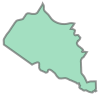

In [12]:
neighborhoods.geometry[0]

# Writing out to file

In [13]:
listings.geometry[[0]]

0    POINT (-97.73674 30.30123)
Name: geometry, dtype: geometry

In [14]:
neighborhoods.geometry[[0]]

0    (POLYGON ((-97.890016 30.209412, -97.889286 30...
Name: geometry, dtype: object

In [15]:
neighborhoods.crs = {'init': 'epsg:4326'}
listings.crs = {'init':'epsg:4326'}

E:\python\installconda\envs\geopy2020\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
E:\python\installconda\envs\geopy2020\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [16]:
#neighborhoods.to_file('../data/neighborhoods.gpkg', driver='GPKG')

In [17]:
listings.to_file('D:/geospatial analysis python/scipy2019-intermediate-gds-master/data/listings.gpkg', driver='GPKG')

# Finding Addresses

In [24]:
import geopy

In [25]:
coder = geopy.Nominatim(user_agent='scipy2019-intermediate-gds')

In [26]:
coder.reverse?

Signature:
coder.reverse(
    query,
    *,
    exactly_one=True,
    timeout=DEFAULT_SENTINEL,
    language=False,
    addressdetails=True,
    zoom=None,
)
Docstring:
Return an address by location point.

:param query: The coordinates for which you wish to obtain the
    closest human-readable addresses.
:type query: :class:`geopy.point.Point`, list or tuple of ``(latitude,
    longitude)``, or string as ``"%(latitude)s, %(longitude)s"``.

:param bool exactly_one: Return one result or a list of results, if
    available.

:param int timeout: Time, in seconds, to wait for the geocoding service
    to respond before raising a :class:`geopy.exc.GeocoderTimedOut`
    exception. Set this only if you wish to override, on this call
    only, the value set during the geocoder's initialization.

:param str language: Preferred language in which to return results.
    Either uses standard
    `RFC2616 <http://www.ietf.org/rfc/rfc2616.txt>`_
    accept-language string or a simple comma-separated

In [27]:
address = coder.reverse((listings.latitude[0], listings.longitude[0]))

In [28]:
address

Location(314, West 37th Street, Lakeview, Austin, Travis County, Texas, 78705, United States, (30.3012555, -97.73667736890496, 0.0))

In [29]:
address.raw

{'place_id': 179523742,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 382033252,
 'lat': '30.3012555',
 'lon': '-97.73667736890496',
 'display_name': '314, West 37th Street, Lakeview, Austin, Travis County, Texas, 78705, United States',
 'address': {'house_number': '314',
  'road': 'West 37th Street',
  'neighbourhood': 'Lakeview',
  'city': 'Austin',
  'county': 'Travis County',
  'state': 'Texas',
  'postcode': '78705',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': ['30.301159', '30.301353', '-97.736751', '-97.736604']}

In [30]:
listings.head(20)[['latitude', 'longitude']]\
        .apply(lambda coord: coder.reverse(coord).address, axis=1)

0     314, West 37th Street, Lakeview, Austin, Travi...
1     2507, East 16th Street, Glenwood, Austin, Trav...
2     2500, East 13th Street, Glenwood, Austin, Trav...
3     105, San Marcos Street, Rainey Street Historic...
4     9422, Shady Oaks Drive, Springwoods, Pond Spri...
5     1022, Harwood Place, Sunnydale, Austin, Travis...
6     709, Garner Avenue, Zilker, Austin, Travis Cou...
7     1702, Mariposa Drive, Elmhurst Heights, Austin...
8     1209, Bickler Road, South River City, Austin, ...
9     1116, Penion Drive, Saddlewood Estates, Travis...
10    1502, Kenwood Avenue, Travis Heights, Austin, ...
11    2808, San Pedro Street, West Campus, Austin, T...
12    8913, Mount Bartlett Drive, The Bluffs of Grea...
13    1914, Valley Hill Circle, Elmhurst Heights, Au...
14    1402, West 13th Street, Clarksville, Austin, T...
15    2006, Alegria Road, Brentwood, Austin, Travis ...
16    3832, Arrow Drive, Woodstone Village, Austin, ...
17    13429, Equestrian Cove, Austin, Travis Cou

In [31]:
#other method
coder.geocode(address.address)


Location(314, West 37th Street, Lakeview, Austin, Travis County, Texas, 78705, United States, (30.3012555, -97.73667736890496, 0.0))

In [32]:
IFrame('https://operations.osmfoundation.org/policies/nominatim/', width=800, height=800)

In [33]:
listings.head(40)[['latitude', 'longitude']]\
.apply(lambda coord: coder.reverse(coord).address, axis=1)

0     314, West 37th Street, Lakeview, Austin, Travi...
1     2507, East 16th Street, Glenwood, Austin, Trav...
2     2500, East 13th Street, Glenwood, Austin, Trav...
3     105, San Marcos Street, Rainey Street Historic...
4     9422, Shady Oaks Drive, Springwoods, Pond Spri...
5     1022, Harwood Place, Sunnydale, Austin, Travis...
6     709, Garner Avenue, Zilker, Austin, Travis Cou...
7     1702, Mariposa Drive, Elmhurst Heights, Austin...
8     1209, Bickler Road, South River City, Austin, ...
9     1116, Penion Drive, Saddlewood Estates, Travis...
10    1502, Kenwood Avenue, Travis Heights, Austin, ...
11    2808, San Pedro Street, West Campus, Austin, T...
12    8913, Mount Bartlett Drive, The Bluffs of Grea...
13    1914, Valley Hill Circle, Elmhurst Heights, Au...
14    1402, West 13th Street, Clarksville, Austin, T...
15    2006, Alegria Road, Brentwood, Austin, Travis ...
16    3832, Arrow Drive, Woodstone Village, Austin, ...
17    13429, Equestrian Cove, Austin, Travis Cou

# Cleaning Data

In [34]:
listings.price.head()

0     $85.00
1    $225.00
2    $100.00
3     $95.00
4     $40.00
Name: price, dtype: object

In [35]:
listings['price'] = (listings.price.str.replace('$','') # replace dollars with nothing
                                  .str.replace(',','_') # swap , for _
                                  .replace('', pd.np.nan) # an empty string is missing data
                                  .astype(float)) # and cast to a float

E:\python\installconda\envs\geopy2020\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
E:\python\installconda\envs\geopy2020\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
listings.price.head()

0     85.0
1    225.0
2    100.0
3     95.0
4     40.0
Name: price, dtype: float64

<AxesSubplot:>

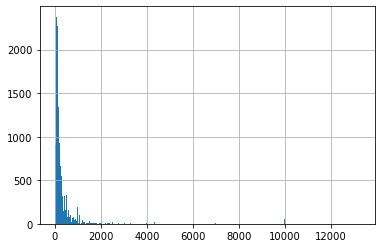

In [37]:
listings.price.hist(bins=300)

In [38]:
listings.iloc[listings.price.idxmax()][['id','name','price', 'accommodates','listing_url']]

id                                           33614278
name               THE ARRIVE SAPPHIRE ON LAKE AUSTIN
price                                         13229.0
accommodates                                       18
listing_url     https://www.airbnb.com/rooms/33614278
Name: 11389, dtype: object

In [39]:
IFrame(src=listings.iloc[listings.price.idxmax()].listing_url, 
       width=800, height=800)

In [40]:
#dropping outliers
listings = listings[listings.price < listings.price.quantile(.99)]
listings = listings[listings.price > listings.price.quantile(.01)]

<AxesSubplot:>

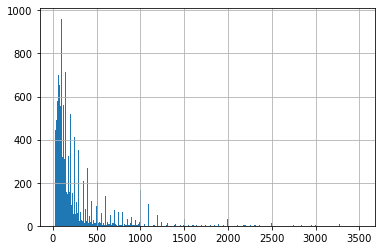

In [41]:
listings.price.hist(bins=300)

In [42]:
#re projection to Web Mercator projection
listings = listings.to_crs(epsg=3857)
#neighborhoods = neighborhoods.to_crs(epsg=3857)

In [43]:
neighborhoods = geopandas.GeoDataFrame(neighborhoods, crs="EPSG:4326", geometry='geometry')

In [44]:
neighborhoods = neighborhoods.to_crs(epsg=3857)

In [45]:
#Data in the total_bounds attribute is stored in (west, south, east, north)
neighborhoods.total_bounds

array([-10917264.20931646,   3512350.07574952, -10858277.45829849,
         3570742.87985925])

In [46]:
import contextily
basemap, basemap_extent = contextily.bounds2img(*neighborhoods.total_bounds, 
                                                zoom=10)

In [47]:
basemap_extent

(-10918876.616480857,
 -10840605.099516837,
 3483082.504898911,
 3600489.7803449417)

<AxesSubplot:>

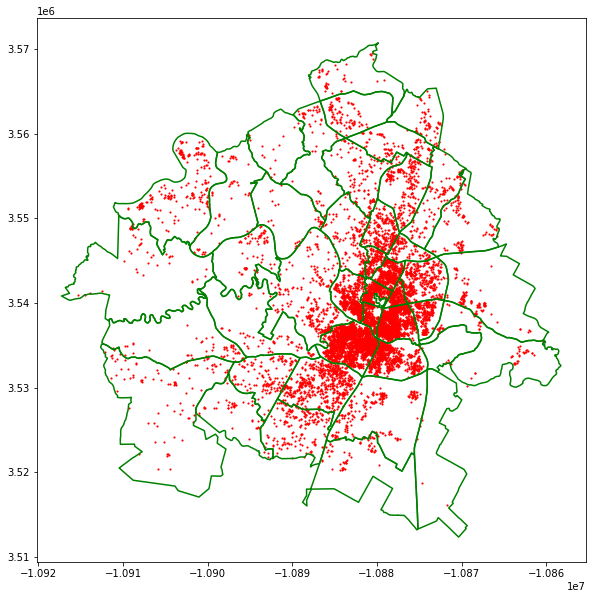

In [48]:
plt.figure(figsize=(10, 10))
neighborhoods.boundary.plot(ax=plt.gca(), color='green')
listings.plot(ax=plt.gca(), marker='.', markersize=5, color='red')

(-10917264.209316462,
 -10858277.458298488,
 3512350.0757495197,
 3570742.8798592538)

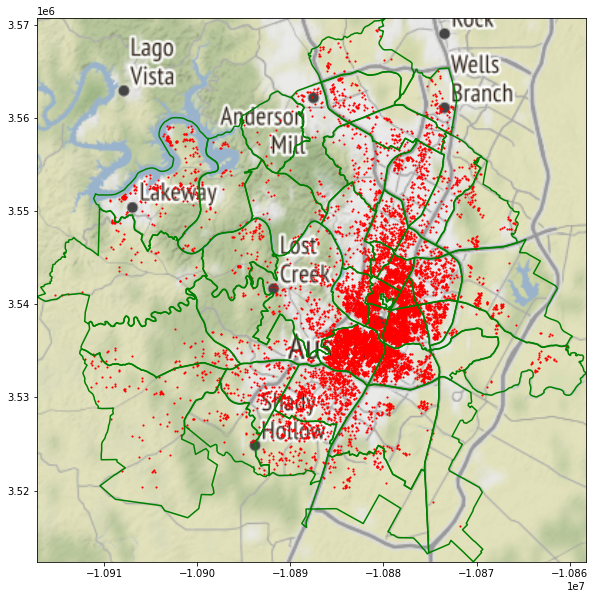

In [49]:
plt.figure(figsize=(10, 10))
plt.imshow(basemap, extent=basemap_extent, interpolation='bilinear')
neighborhoods.boundary.plot(ax=plt.gca(), color='green')
listings.plot(ax=plt.gca(), marker='.', markersize=5, color='red')

# and, to make sure the view is focused only on our data:
plt.axis(neighborhoods.total_bounds[[0,2,1,3]])

In [50]:
tonermap, tonermap_extent = contextily.bounds2img(*neighborhoods.total_bounds, zoom=10, 
                                                  url=contextily.tile_providers.ST_TONER_LITE)

E:\python\installconda\envs\geopy2020\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The "contextily.tile_providers" module is deprecated and will be removed in contextily v1.1. Please use "contextily.providers" instead.
  
E:\python\installconda\envs\geopy2020\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  


(-10917264.209316462,
 -10858277.458298488,
 3512350.0757495197,
 3570742.8798592538)

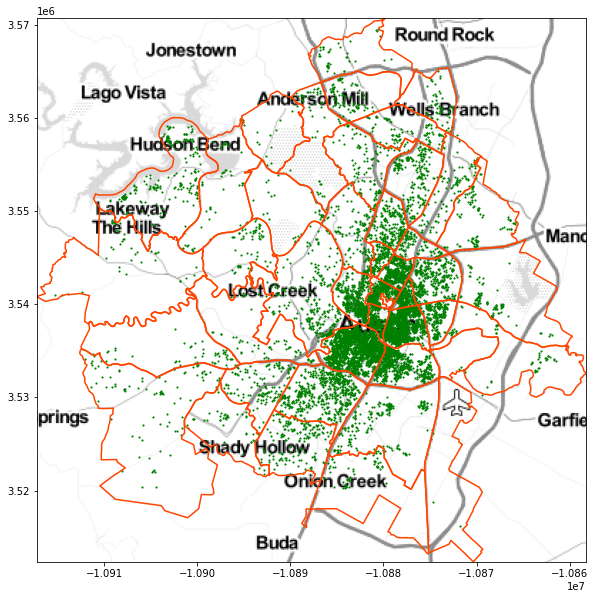

In [51]:
plt.figure(figsize=(10,10))
plt.imshow(tonermap, extent=tonermap_extent)
neighborhoods.boundary.plot(ax=plt.gca(), color='orangered')
listings.plot(ax=plt.gca(), marker='.', markersize=5, color='green')
plt.axis(neighborhoods.total_bounds[[0,2,1,3]])

In [52]:
transit = 'http://tile.memomaps.de/tilegen/tileZ/tileX/tileY.png'

In [53]:
transitmap, transitmap_extent = contextily.bounds2img(*neighborhoods.total_bounds, zoom=10, 
                                                      url=transit)

E:\python\installconda\envs\geopy2020\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  
E:\python\installconda\envs\geopy2020\lib\site-packages\contextily\tile.py:268: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  FutureWarning,


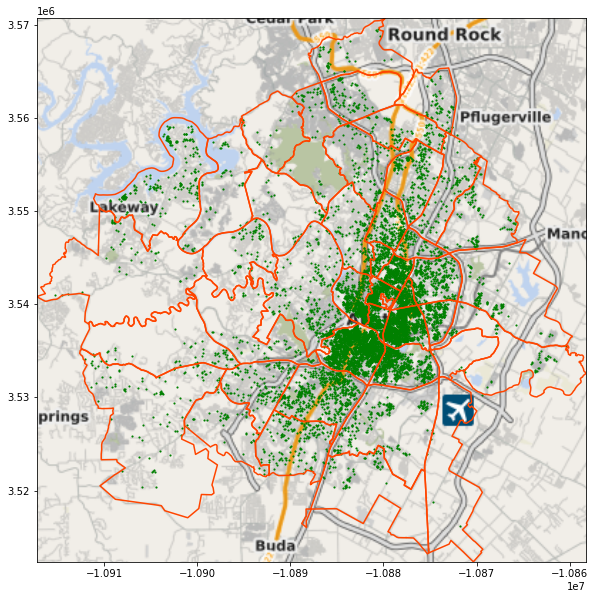

In [55]:
plt.figure(figsize=(10,10))
plt.imshow(transitmap, extent=transitmap_extent, interpolation='bilinear')
neighborhoods.boundary.plot(ax=plt.gca(), color='orangered')
listings.plot(ax=plt.gca(), marker='.', markersize=5, color='green')
outfp = "C:/Users/HP/Desktop/assignment2/airbnbs_Austin.png"
plt.savefig(outfp, dpi=300)
plt.axis(neighborhoods.total_bounds[[0,2,1,3]])
plt.savefig(outfp, dpi=300)

In [57]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="scipy2019-intermediate-gds")
location = geolocator.geocode("Tartu")
print(location.address)

Tartu linn, Tartu maakond, Eesti


In [58]:
print((location.latitude, location.longitude))

(58.3801207, 26.72245)


In [59]:
print(location.raw)

{'place_id': 258380549, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 2153396, 'boundingbox': ['58.3390198', '58.4109396', '26.6670755', '26.7980421'], 'lat': '58.3801207', 'lon': '26.72245', 'display_name': 'Tartu linn, Tartu maakond, Eesti', 'class': 'boundary', 'type': 'administrative', 'importance': 0.6812947405598158, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons//poi_boundary_administrative.p.20.png'}


In [60]:
bounds=['58.3390198', '58.4109396', '26.6670755', '26.7980421']


# Building up areas for visualization

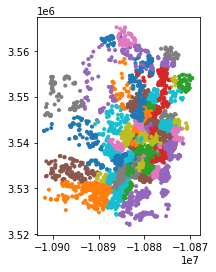

In [61]:
outfp="C:/Users/HP/Desktop/assignment2/neighborhood_points.png"
listings.dropna(subset=['hood']).plot('hood', marker='.')
plt.savefig(outfp, dpi=200)


In [62]:
(listings.groupby('hood') #group by the neighborhood
         .id.count() # get the count of observations
         .sort_values(ascending=False) # sort the counts to have the most populous first
         .head(20)) # and get the top 20

hood
East Downtown          1121
Downtown                627
Travis Heights          479
University of Texas     409
Zilker                  381
Bouldin Creek           354
East Riverside          337
Barton Hills            308
South Lamar             306
Cherry Creek            281
MLK & 183               258
Upper Boggy Creek       236
McKinney                210
Old West Austin         202
South Congress          178
Govalle                 172
Hancock                 168
Hyde Park               157
North Loop              156
Mueller                 155
Name: id, dtype: int64

In [63]:
listings.iloc[[0,1,2,3]].geometry

0    POINT (-10880004.129 3542329.215)
1    POINT (-10877470.497 3539269.986)
2    POINT (-10877449.346 3539046.986)
3    POINT (-10879752.547 3537158.737)
Name: geometry, dtype: geometry

# making poligon from points by convex_hull method


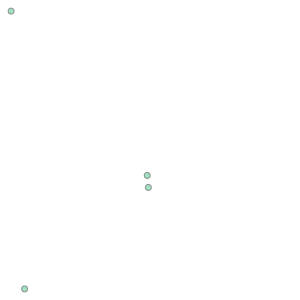

In [64]:
listings.iloc[[0,1,2,3]].geometry.unary_union

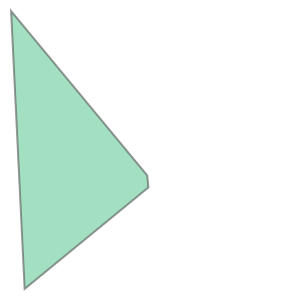

In [65]:
listings.iloc[[0,1,2,3]].geometry.unary_union.convex_hull

In [66]:
hood_groups = listings.groupby('hood')

In [67]:
chulls = hood_groups.geometry.apply(lambda hood: hood.unary_union.convex_hull)

In [68]:
chulls.head()

hood
Allendale                     POLYGON ((-10880815.648 3544394.904, -10881679...
Anderson Mill                 POLYGON ((-10886743.411 3561154.691, -10888001...
Angus Valley                  POLYGON ((-10879230.458 3556757.414, -10881970...
Balcones Civic Association    POLYGON ((-10881092.833 3550307.580, -10882517...
Balcony Woods                 POLYGON ((-10878861.991 3554630.333, -10881785...
Name: geometry, dtype: geometry

In [69]:
chulls = geopandas.GeoDataFrame(chulls.reset_index())

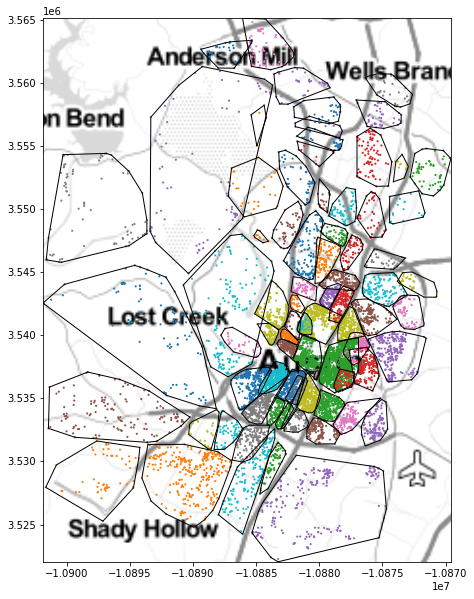

In [70]:
plt.figure(figsize=(10,10))
plt.imshow(tonermap, extent=tonermap_extent, interpolation='bilinear')
chulls.boundary.plot(linewidth=1, color='k', ax=plt.gca())
listings.dropna(subset=['hood']).plot('hood', ax=plt.gca(), 
                                      marker='.', markersize=5)
plt.axis(chulls.total_bounds[[0,2,1,3]])
outfp = "C:/Users/HP/Desktop/assignment2/neighborhood_covex_hull.png"
plt.savefig(outfp, dpi=300)
plt.show()

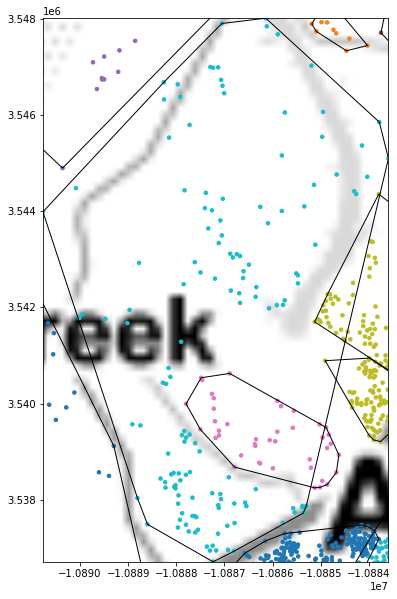

In [71]:
plt.figure(figsize=(10,10))
plt.imshow(tonermap, extent=tonermap_extent, interpolation='bilinear')
chulls.boundary.plot(ax=plt.gca(), linewidth=1, color='k')
listings.dropna(subset=['hood']).plot('hood', ax=plt.gca(), 
                                      marker='.', markersize=50)
plt.axis(chulls.query('hood == "Westlake Hills"').total_bounds[[0,2,1,3]])
plt.show()

## Using Alpha Shape method for converting points to poligon

In [72]:
import pysal

In [103]:
pip install libpysal

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: libpysal in e:\python\installconda\envs\geopy2020\lib\site-packages (4.4.0)



In [73]:
import libpysal

In [76]:
alpha_shape_auto=libpysal.cg.alpha_shape_auto
get_points_array=libpysal.weights.distance.get_points_array

In [77]:
#getting coordinates
ashapes = hood_groups.geometry.apply(lambda hood: alpha_shape_auto(
                                                  get_points_array(hood)))
ashapes = geopandas.GeoDataFrame(ashapes.reset_index())

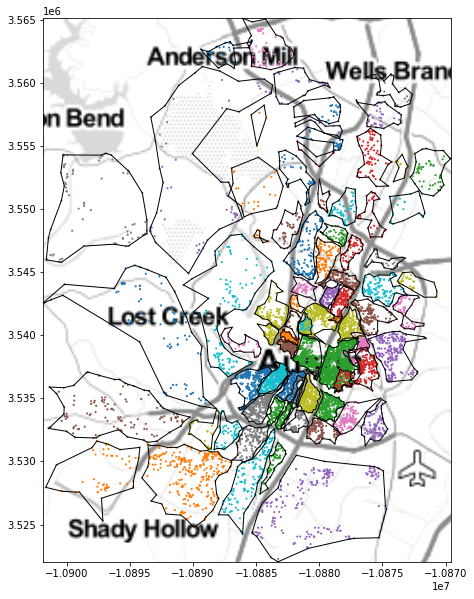

In [79]:
plt.figure(figsize=(10,10))
plt.imshow(tonermap, extent=tonermap_extent, interpolation='bilinear')
ashapes.boundary.plot(color='k', linewidth=1, ax=plt.gca())
listings.dropna(subset=['hood']).plot('hood', ax=plt.gca(), 
                                      marker='.', markersize=5)
plt.axis(ashapes.total_bounds[[0,2,1,3]])
outfp = "C:/Users/HP/Desktop/assignment2/neighborhood_alpha_shape.png"
plt.savefig(outfp, dpi=300)
plt.show()

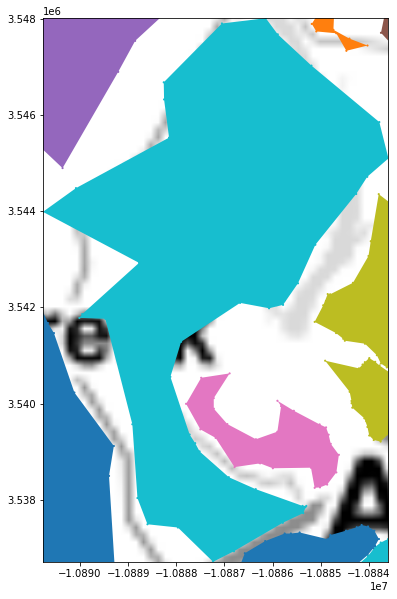

In [80]:
plt.figure(figsize=(10,10))
plt.imshow(tonermap, extent=tonermap_extent, interpolation='bilinear')
ashapes.plot('hood', ax=plt.gca(), linewidth=2)
listings.dropna(subset=['hood']).plot('hood', ax=plt.gca(), 
                                      marker='.', markersize=5)
plt.axis(ashapes.query('hood == "Westlake Hills"').total_bounds[[0,2,1,3]])
plt.show()

# Spatial Joins

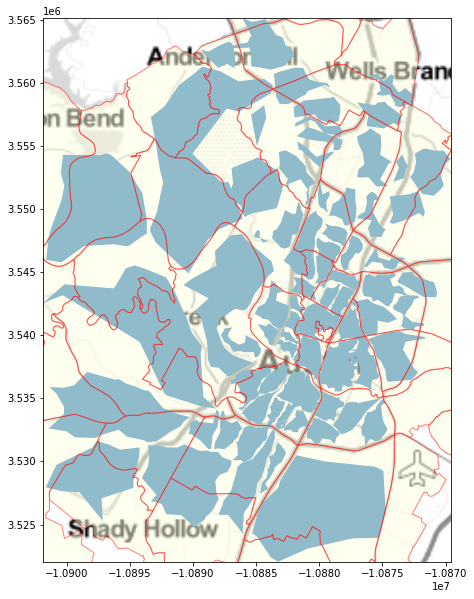

In [81]:
#joining shape file and neighborhood data
plt.figure(figsize=(10,10))
plt.imshow(tonermap, extent=tonermap_extent, interpolation='bilinear')
ashapes.plot(linewidth=1, ax=plt.gca())
neighborhoods.plot(ax=plt.gca(), alpha=.5, 
                   edgecolor='red', facecolor='lightyellow')
plt.axis(ashapes.total_bounds[[0,2,1,3]])
plt.show()

In [82]:
listings_in_hoods = geopandas.sjoin(listings, neighborhoods, op='within')

In [85]:
listings_in_hoods.head()[['id', 'hood', 'index_right', 'hood_id']]

id                 hood  index_right  hood_id
0    1078  University of Texas           31    78705
11  21145          West Campus           31    78705
23  50318  University of Texas           31    78705
39  73289  University of Texas           31    78705
74  84771  University of Texas           31    78705

In [88]:
compositions = listings_in_hoods.groupby(['hood', 'hood_id']).id.count()
compositions

hood           hood_id
Allendale      78731       37
               78756       42
               78757       50
Anderson Mill  78729        5
               78750       27
                         ... 
Windsor Park   78723      129
Wooten         78757       48
               78758       20
Zilker         78704      377
               78746        4
Name: id, Length: 151, dtype: int64

In [89]:
compositions.unstack().fillna('-')

hood_id                    78701 78702 78703  78704 78705 78712 78717 78719  \
hood                                                                          
Allendale                      -     -     -      -     -     -     -     -   
Anderson Mill                  -     -     -      -     -     -     -     -   
Angus Valley                   -     -     -      -     -     -     -     -   
Balcones Civic Association     -     -     -      -     -     -     -     -   
Balcony Woods                  -     -     -      -     -     -     -     -   
...                          ...   ...   ...    ...   ...   ...   ...   ...   
Westlake Hills                 -     -     -      -     -     -     -     -   
Windsor Hills                  -     -     -      -     -     -     -     -   
Windsor Park                   -     -     -      -     -     -     -     -   
Wooten                         -     -     -      -     -     -     -     -   
Zilker                         -     -     -  377.0     -     -     -     -   

hood_id                    78721 78722  ... 78749 78750 78751 78752 78753  \
hood                                    ...                                 
Allendale                      -     -  ...     -     -     -     -     -   
Anderson Mill                  -     -  ...     -  27.0     -     -     -   
Angus Valley                   -     -  ...     -     -     -     -     -   
Balcones Civic Association     -     -  ...     -     -     -     -     -   
Balcony Woods                  -     -  ...     -     -     -     -     -   
...                          ...   ...  ...   ...   ...   ...   ...   ...   
Westlake Hills                 -     -  ...     -     -     -     -     -   
Windsor Hills                  -     -  ...     -     -     -     -  14.0   
Windsor Park                   -     -  ...     -     -     -     -     -   
Wooten                         -     -  ...     -     -     -     -     -   
Zilker                         -     -  ...     -     -     -     -     -   

hood_id                    78754 78756 78757 78758 78759  
hood                                                      
Allendale                      -  42.0  50.0     -     -  
Anderson Mill                  -     -     -     -     -  
Angus Valley                   -     -     -     -   3.0  
Balcones Civic Association     -     -     -     -  50.0  
Balcony Woods                  -     -     -  26.0  10.0  
...                          ...   ...   ...   ...   ...  
Westlake Hills                 -     -     -     -     -  
Windsor Hills                6.0     -     -     -     -  
Windsor Park                   -     -     -     -     -  
Wooten                         -     -  48.0  20.0     -  
Zilker                         -     -     -     -     -  

[78 rows x 44 columns]

In [90]:
listings_in_hoods.dropna(subset=['hood']).groupby('hood_id').hood.unique()

hood_id
78701       [Downtown, Rainey Street, University of Texas]
78702    [East Downtown, Govalle, Holly, Rosewood, Uppe...
78703    [Clarksville, Tarrytown, Old West Austin, West...
78704    [Travis Heights, Zilker, Barton Hills, Dawson,...
78705    [University of Texas, West Campus, Hancock, Br...
78712                                [University of Texas]
78717                                  [SW Williamson Co.]
78719                                           [McKinney]
78721                                          [MLK & 183]
78722               [Upper Boggy Creek, Rosewood, Mueller]
78723    [Windsor Park, Pecan Spings, Mueller, Universi...
78724                     [Pecan Spings, University Hills]
78725                                          [MLK & 183]
78726                                        [Long Canyon]
78727    [Scofield Ridge, Angus Valley, Lamplight Villa...
78728                                     [Scofield Ridge]
78729    [SW Williamson Co., Anderson Mill, Long

In [91]:
number_unique = listings_in_hoods.dropna(subset=['hood']).groupby('hood_id')\
                                 .hood.unique().apply(len)

In [92]:
number_unique.head()

hood_id
78701     3
78702     5
78703     7
78704    12
78705     5
Name: hood, dtype: int64

In [93]:
saidhoods_in_hood = neighborhoods.merge(number_unique.to_frame('number_names'),
                                        how='left', 
                                        left_on='hood_id', right_index=True)

(-10917264.209316462,
 -10858277.458298488,
 3512350.0757495197,
 3570742.8798592538)

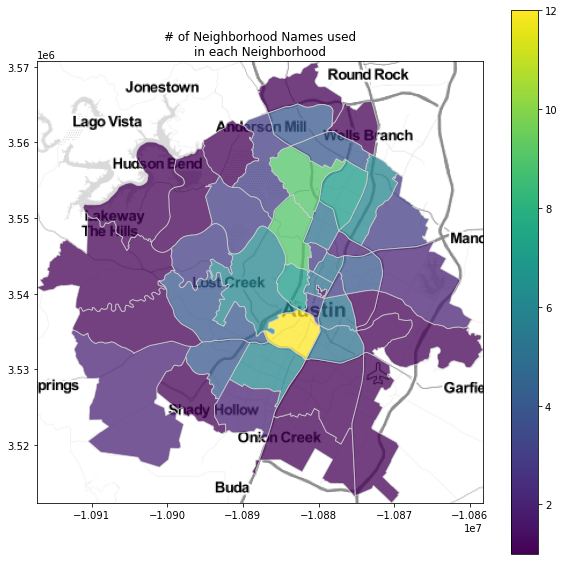

In [94]:
plt.figure(figsize=(10,10))
plt.imshow(tonermap, extent=tonermap_extent)
saidhoods_in_hood.plot('number_names', ax = plt.gca(), 
                       alpha=.75, edgecolor='lightgrey', legend=True)
plt.title('# of Neighborhood Names used\nin each Neighborhood')
outfp = "C:/Users/HP/Desktop/assignment2/neighborhood_name.png"
plt.savefig(outfp, dpi=300)
plt.axis(saidhoods_in_hood.total_bounds[[0,2,1,3]])

### What do nearby airbnbs look like?

<AxesSubplot:>

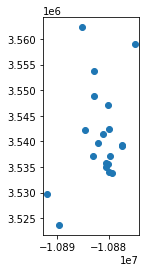

In [96]:
#distance-based query
listings.head(20).plot()

<AxesSubplot:>

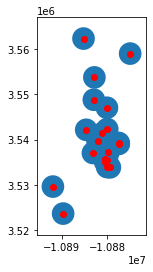

In [98]:
#making buffer
ax = listings.head(20).buffer(2500).plot()
listings.head(20).plot(ax=ax, color='red')



<AxesSubplot:>

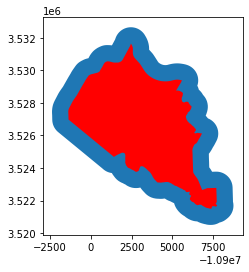

In [99]:
ax = neighborhoods.iloc[[0]].buffer(1000).plot()
neighborhoods.iloc[[0]].plot(color='red', ax=ax)

# what is the average price per head in 1000 meters around each Airbnb

In [101]:
#we can pick the two downtown neighborhoods in our dataset
downtown_hoods = ('Downtown', 'East Downtown')


In [102]:
downtown_listings = listings.query('hood in @downtown_hoods')

In [103]:
searchbuffer = downtown_listings.buffer(1000)

In [104]:
searchbuffer.head()

1     POLYGON ((-10876470.497 3539269.986, -10876475...
2     POLYGON ((-10876449.346 3539046.986, -10876454...
3     POLYGON ((-10878752.547 3537158.737, -10878757...
42    POLYGON ((-10877325.431 3539148.818, -10877330...
44    POLYGON ((-10877790.746 3535433.136, -10877795...
dtype: geometry

In [105]:
searchbuffer = geopandas.GeoDataFrame(downtown_listings.price.values/downtown_listings.accommodates.values,
                                      geometry=searchbuffer.tolist(), 
                                      columns=['buffer_pph'], 
                                      index=downtown_listings.id.values)
searchbuffer.crs = downtown_listings.crs
searchbuffer.head()

buffer_pph                                           geometry
2265    56.250000  POLYGON ((-10876470.497 3539269.986, -10876475...
5245    50.000000  POLYGON ((-10876449.346 3539046.986, -10876454...
5456    31.666667  POLYGON ((-10878752.547 3537158.737, -10878757...
74716   18.750000  POLYGON ((-10877325.431 3539148.818, -10877330...
75174   43.333333  POLYGON ((-10877790.746 3535433.136, -10877795...

In [106]:
#finding the average price within 1000 meters of each Airbnb by finding *which* 1000 meter buffers intersect each Airbnb listing:
listing_buffer_join = geopandas.sjoin(downtown_listings, searchbuffer, op='intersects')

In [107]:
listing_buffer_join = listing_buffer_join.query('id != index_right')

In [108]:
downtown_areasummaries = listing_buffer_join.groupby('id').buffer_pph.describe()

In [109]:
downtown_areasummaries.head()

count       mean        std        min        25%      50%        75%  \
id                                                                             
2265   222.0  57.536552  46.378936   6.500000  29.000000  40.3125  69.812500   
5245   229.0  57.085217  45.990329   6.500000  28.750000  41.2500  69.250000   
5456   417.0  72.705886  69.951196   7.666667  33.333333  50.0000  77.000000   
74716  260.0  57.276730  45.729743   8.500000  29.791667  42.2500  65.416667   
75174   92.0  58.892689  46.247607  15.000000  32.375000  49.7500  67.500000   

         max  
id            
2265   300.0  
5245   300.0  
5456   500.0  
74716  300.0  
75174  300.0

In [110]:
#merging with orignal data
downtown_areasummaries = downtown_listings.merge(left_on='id', 
                                                 right=downtown_areasummaries,
                                                 right_index=True, how='left')

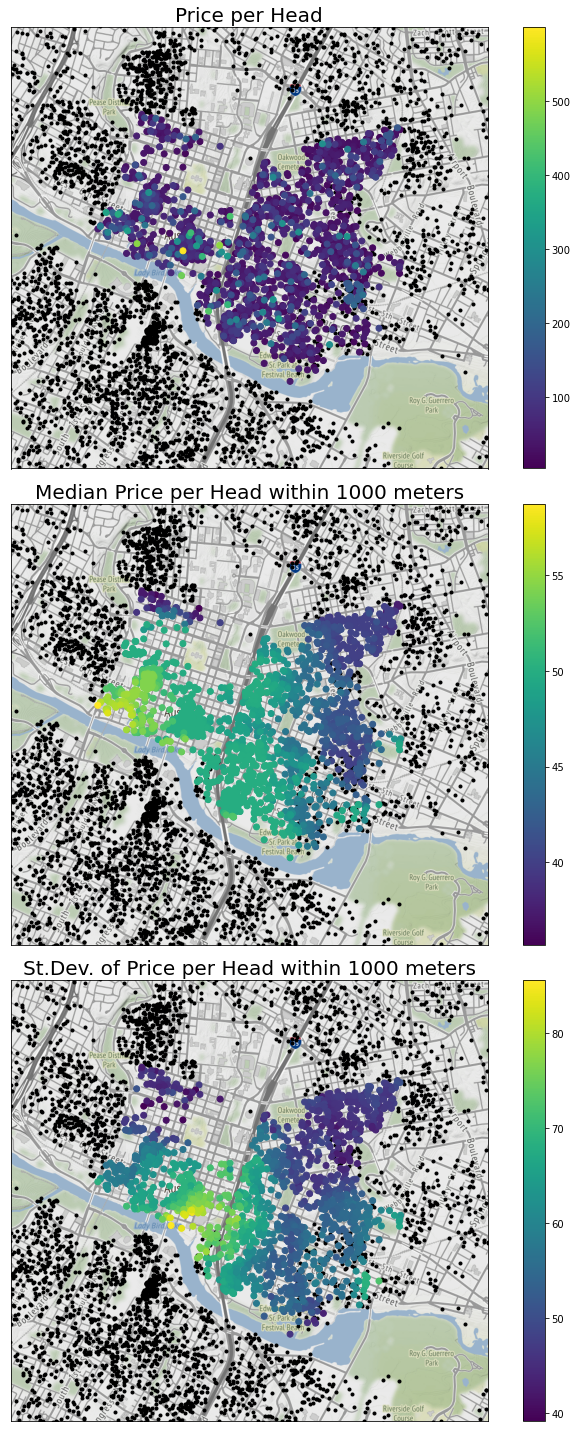

In [112]:
f, ax = plt.subplots(3,1,figsize=(10,20), sharex=True, sharey=True)
downtown_basemap, downtown_basemap_extent = contextily.bounds2img(*downtown_listings.buffer(1500).total_bounds, zoom=14)
for ax_ in ax:
    listings.plot(color='k', marker='.', ax=ax_)
    ax_.set_xticks([])
    ax_.set_xticklabels([])
    ax_.set_yticks([])
    ax_.set_yticklabels([])
    ax_.imshow(downtown_basemap, extent=downtown_basemap_extent)
    
downtown_listings.eval('price_per_head = price / accommodates')\
                 .sort_values('price_per_head', ascending=True)\
                 .plot('price_per_head', 
                       ax=ax[0], legend=True)

downtown_areasummaries.sort_values('50%', ascending=True)\
        .plot('50%', ax=ax[1], legend=True)
downtown_areasummaries.sort_values('50%', ascending=True)\
        .plot('std', ax=ax[2], legend=True)


ax[1].axis(listings.query('hood in @downtown_hoods').total_bounds[[0,2,1,3]])
ax[0].set_title('Price per Head', fontsize=20)
ax[1].set_title('Median Price per Head within 1000 meters', fontsize=20)
ax[2].set_title('St.Dev. of Price per Head within 1000 meters', fontsize=20)
ax[0].axis(downtown_listings.buffer(1500).total_bounds[[0,2,1,3]])
outfp = "C:/Users/HP/Desktop/assignment2/neih.png"
plt.savefig(outfp, dpi=400)
f.tight_layout()

# Using K-D Tree method

In [115]:
get_points_array=libpysal.weights.distance.get_points_array
import numpy

In [116]:
coordinates = get_points_array(listings.geometry)
prices = listings.price.values / listings.accommodates.values

In [117]:
from scipy.spatial import cKDTree

In [118]:
kdt = cKDTree(coordinates)

In [119]:
kdt.query_ball_tree?

Docstring:
query_ball_tree(self, other, r, p=2., eps=0)

Find all pairs of points between `self` and `other` whose distance is at most r

Parameters
----------
other : cKDTree instance
    The tree containing points to search against.
r : float
    The maximum distance, has to be positive.
p : float, optional
    Which Minkowski norm to use.  `p` has to meet the condition
    ``1 <= p <= infinity``.
    A finite large p may cause a ValueError if overflow can occur.
eps : float, optional
    Approximate search.  Branches of the tree are not explored
    if their nearest points are further than ``r/(1+eps)``, and
    branches are added in bulk if their furthest points are nearer
    than ``r * (1+eps)``.  `eps` has to be non-negative.

Returns
-------
results : list of lists
    For each element ``self.data[i]`` of this tree, ``results[i]`` is a
    list of the indices of its neighbors in ``other.data``.

Examples
--------
You can search all pairs of points between two kd-trees within a 

In [120]:
neighbors = kdt.query_ball_tree(kdt, 1000)

In [121]:
numpy.asarray(neighbors[0])

array([    0,    79,    80,    83,    84,    87,   112,   291,   376,
         468,   509,   522,   523,   541,   557,   605,   612,   620,
         640,   657,   701,   709,   717,   742,   770,   789,   869,
        1091,  1094,  1114,  1125,  1224,  1376,  1398,  1526,  1579,
        1736,  1921,  1941,  1979,  2008,  2013,  2034,  2059,  2131,
        2138,  2239,  2282,  2320,  2344,  2362,  2427,  2510,  2556,
        2648,  2718,  2732,  2901,  2940,  2958,  3011,  3246,  3278,
        3284,  3322,  3368,  3371,  3377,  3389,  3402,  3455,  3542,
        3567,  3609,  3654,  3722,  3771,  3779,  3847,  3903,  3931,
        3935,  3964,  4064,  4067,  4143,  4153,  4185,  4246,  4303,
        4380,  4501,  4637,  4652,  4690,  4791,  4797,  4822,  5013,
        5121,  5216,  5348,  5391,  5585,  5618,  5659,  5704,  5739,
        5746,  5824,  5846,  5956,  5957,  6147,  6252,  6585,  6646,
        6773,  6791,  6812,  6834,  6899,  6981,  7046,  7061,  7122,
        7152,  7183,

In [122]:
neighbors = ([other for other in i_neighbors if other != i] for i,i_neighbors in enumerate(neighbors))

In [123]:
def summarize(ary):
    return numpy.median(ary), numpy.std(ary)

In [124]:
summary = numpy.asarray([summarize(prices[neighbs]) for neighbs in neighbors]) 

E:\python\installconda\envs\geopy2020\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
E:\python\installconda\envs\geopy2020\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
E:\python\installconda\envs\geopy2020\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
E:\python\installconda\envs\geopy2020\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
E:\python\installconda\envs\geopy2020\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [125]:
medians, deviations = zip(*summary)
listings['median_pph_1km'], listings['std_pph_1km'] = medians, deviations

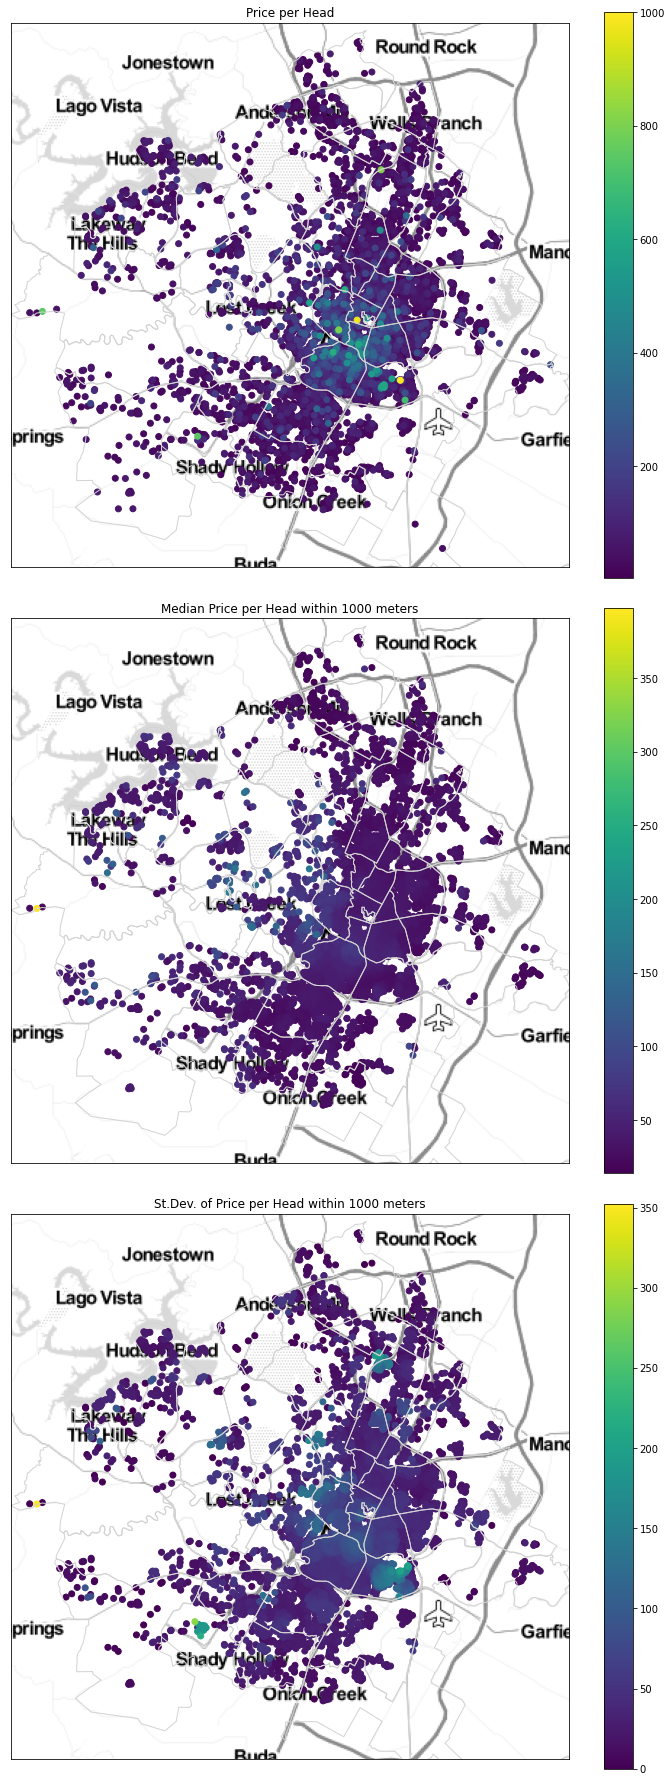

In [126]:
f, ax = plt.subplots(3,1,figsize=(10,25), sharex=True, sharey=True)
    
listings.eval('price_per_head = price / accommodates')\
        .sort_values('price_per_head', ascending=True)\
        .plot('price_per_head', ax=ax[0], legend=True)

listings.sort_values('median_pph_1km', ascending=True)\
        .plot('median_pph_1km', ax=ax[1], legend=True)
listings.sort_values('std_pph_1km', ascending=True)\
        .plot('std_pph_1km', ax=ax[2], legend=True)


ax[0].set_title('Price per Head')
ax[1].set_title('Median Price per Head within 1000 meters')
ax[2].set_title('St.Dev. of Price per Head within 1000 meters')

for ax_ in ax:
    ax_.set_xticks([])
    ax_.set_xticklabels([])
    ax_.set_yticks([])
    ax_.set_yticklabels([])
    ax_.imshow(tonermap, extent=tonermap_extent)
    ax_.axis(listings.buffer(2000).total_bounds[[0,2,1,3]])
    neighborhoods.plot(ax=ax_, edgecolor='lightgrey', facecolor='none')
outfp = "C:/Users/HP/Desktop/assignment2/kd-tree.png"
plt.savefig(outfp, dpi=400)
f.tight_layout()

# nearest neighbor join

In [127]:
is_shared = ~ (listings.room_type=="Entire home/apt")

In [128]:
shared_kdt = cKDTree(coordinates[is_shared])
alone_kdt = cKDTree(coordinates[~ is_shared])

In [129]:
shared_kdt.query?

Docstring:
query(self, x, k=1, eps=0, p=2, distance_upper_bound=np.inf, workers=1)

Query the kd-tree for nearest neighbors

Parameters
----------
x : array_like, last dimension self.m
    An array of points to query.
k : list of integer or integer
    The list of k-th nearest neighbors to return. If k is an
    integer it is treated as a list of [1, ... k] (range(1, k+1)).
    Note that the counting starts from 1.
eps : non-negative float
    Return approximate nearest neighbors; the k-th returned value
    is guaranteed to be no further than (1+eps) times the
    distance to the real k-th nearest neighbor.
p : float, 1<=p<=infinity
    Which Minkowski p-norm to use.
    1 is the sum-of-absolute-values "Manhattan" distance
    2 is the usual Euclidean distance
    infinity is the maximum-coordinate-difference distance
    A finite large p may cause a ValueError if overflow can occur.
distance_upper_bound : nonnegative float
    Return only neighbors within this distance.  This is used

In [130]:
nearest_unshared_dist, nearest_unshared_ix = shared_kdt.query(coordinates[~is_shared], k=1)
nearest_alone_dist, nearest_alone_ix = alone_kdt.query(coordinates[is_shared], k=1)

In [131]:
listings.loc[~is_shared, 'nearest_othertype'] = listings.index[nearest_unshared_ix]
listings.loc[is_shared, 'nearest_othertype'] = listings.index[nearest_alone_ix]

In [132]:
listings.loc[~is_shared, 'nearest_othertype_dist'] = nearest_unshared_dist
listings.loc[is_shared, 'nearest_othertype_dist'] = nearest_alone_dist

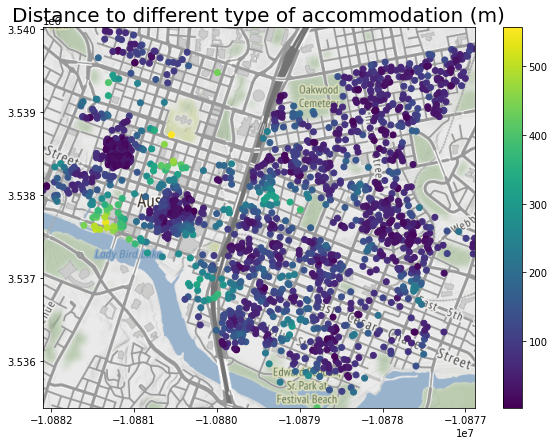

In [133]:
f = plt.figure(figsize=(10,7))
plt.imshow(downtown_basemap, extent=downtown_basemap_extent)
listings.query('hood in @downtown_hoods').plot('nearest_othertype_dist', ax=plt.gca(), legend=True)
plt.axis(downtown_listings.total_bounds[[0,2,1,3]])
plt.title('Distance to different type of accommodation (m)', fontsize=20)
outfp = "C:/Users/HP/Desktop/assignment2/nearest_neighborhood.png"
plt.savefig(outfp, dpi=400)